In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("data.csv",index_col="id")

In [11]:
df.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
id,,,,,,,,,,,,,,,,,,,,,
0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,14,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,6,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,5,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,13,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,5,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [12]:
from sklearn.cluster import KMeans

In [15]:
wcss = []
for i in range(1,18):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

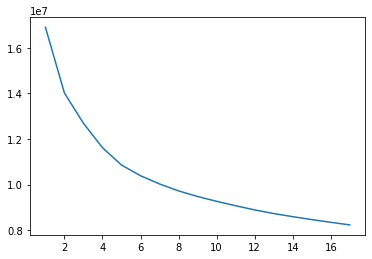

In [16]:
plt.plot(range(1,18),wcss)
plt.show()

In [17]:
wcss

[16901689.75538162,
 14014809.473016586,
 12687942.899808452,
 11618440.852257354,
 10856612.668496182,
 10387281.59270501,
 10027195.378430737,
 9722672.885626286,
 9476588.52817534,
 9265915.40551794,
 9071473.132517062,
 8888696.644744057,
 8728560.952870078,
 8592196.203599239,
 8464036.972196862,
 8345160.273158406,
 8230272.766500259]

<AxesSubplot:>

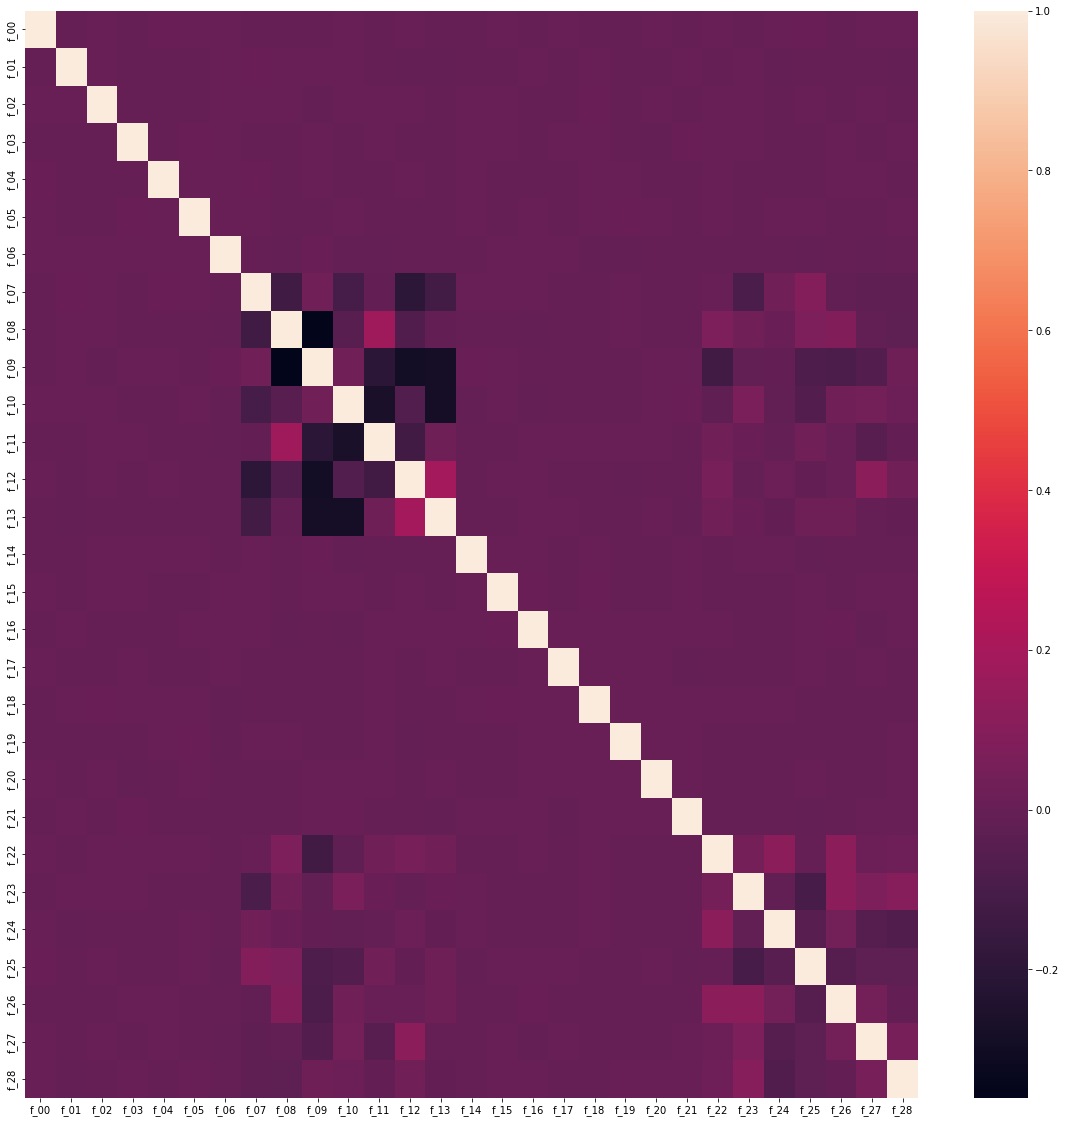

In [19]:
correl = df.corr()
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(correl)

In [20]:
KMeans_opt = KMeans(n_clusters=5,random_state=0)
KMeans_opt.fit(df)

KMeans(n_clusters=5, random_state=0)

In [24]:
y = KMeans_opt.predict(df)

In [26]:
df_result = pd.DataFrame(columns=["Predicted"]) 

In [27]:
df_result['Predicted'] = y

In [31]:
df_result.reset_index(inplace=True)

In [42]:
df_result.rename(columns={"index":"id"},inplace=True)

In [43]:
df_result.to_csv("out2.csv",index=False)